# Capstone Project Outline

## Problem Statement:

The goal of this project is to evaluate favorability of sites in California for rooftop solar power development. The assessment is focused by county and integrates the existing power infrastructure (type, age, capacity), power demand, power cost, and potentially developable rooftop area in order to identify regions with the most available market development.

## Background

Electrical power generation in the state of California comes from a patchwork of predominantly natural gas, hydro, and renewable energy power as well as a single nuclear powerplant (Diablo Canyon) and a few large out of state sources (Columbia River hydro, Utah coal plants, etc).  Rooftop solar power generation is favorable because it is moular and can be easily installed within the demand environment (in town).  This cuts down on transmission costs and also boosts the contribution from renewables, particularly important in California where the greenhouse emissions standards are some the most strict in the country.

| Fuel Type | In-State Generation (GWh) |  In-State Generation (%) | NW Imports (GWh) | SW Imports (GWh) | Energy Mix (GWh) | Power Mix (%) |
| - | - | - | - | - | - | - |
| Coal | 294 | 0.15% | 399 | 8,740 | 9,433 | 3.30% |
| Large Hydro | 22,096 | 11.34% | 7,418 | 985 | 30,499 | 10.68% |
| Natural Gas | 90,691 | 46.54% | 49 | 8,904 | 99,644 | 34.91% |
| Nuclear | 18,268 | 9.38% | 0 | 7,573 | 25,841 | 9.05% |
| Oil | 35 | 0.02% | 0 | 0 | 35 | 0.01% |
| Other | 430 | 0.22% | 0 | 9 | 439 | 0.15% |
| Renewables | 63,028 | 32.35% | 14,074 | 12,400 | 89,502 | 31.36% |
| Biomass | 5,909 | 3.03% | 772 | 26 | 6,707 | 2.35% |
| Geothermal | 11,528 | 5.92% | 171 | 1,269 | 12,968 | 4.54% |
| Small Hydro | 4,248 | 2.18% | 334 | 1 | 4,583 | 1.61% |
| Solar | 27,265 | 13.99% | 174 | 5,094 | 32,533 | 11.40% |
| Wind | 14,078 | 7.23% | 12,623 | 6,010 | 32,711 | 11.46% |
| Unspecified | N/A | N/A | 17,576 | 12,519 | 30,095 | 10.54% |
| Total | 194,842 | 100.00% | 39,517 | 51,130 | 285,488 | 100.00% |

**Other:** Petroleum Coke/Waste Heat

## Methods
- Step 1:  integrate existing data to identify regions with production/consumption mismatch, outdated infrastructure, high cost
- Step 2:  forecast trends in energy production, forecast changes in population, changes in cost

**Target Output**
- 1 row for each county 
- Ranking of solar development favorability from 0-100

**Concern**
- Not really running a model here, more of a classification
- Might be a clustering evaluation?

## Data

**Step 1**
- power plant database:  location, age, capacity **(located, working on access)**
- demand by county **(in hand)**
- electricity cost by county **(derived from utilities map or openei doc)**
- developable rooftop capacity by county **(in hand)**

**Step 2**
- openei production history **(in hand)**
- 2010, 2020 census data by county **(in hand)**
- Dark sky weather archive **(scraper built)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Powerplant Database:  PRODUCTION

- I can estimate power production totals, breakdown, and infrastructure age from this data
- One drawback is that it only goes up to 2014
- I have a lot more EDA to do on this front

In [2]:
power_plants = pd.read_csv('datasets/power_plants_01-14.csv')
power_plants.head().T

,0,1,2,3,4
Plant Type Code,C,C,C,C,C
RPS Eligible,False,False,False,False,False
Primary Fuel Type,Coal,Coal,Coal,Coal,Coal
Solar Thermal,False,False,False,False,False
Small Hydro,False,False,False,False,False
CEC Plant ID,C0001,C0002,C0004,C0005,C0007
EIA Plant ID,10002,10601,54238,56446,10373
Plant Name,ACE Cogeneration (ACE is Argus Cogen Expansion...,Los Angeles Refinery - Calciner,Port of Stockton District Energy Facility - Re...,Buena Vista Biomass Power (Jackson Valley) Ret...,Hanford - Retired October 2011
Unit,GEN 1,UNIT 1,GEN 1,1,GEN 1
State,CA,CA,CA,CA,CA


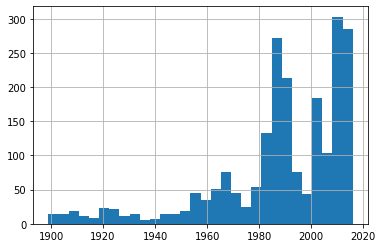

In [3]:
power_plants['Start Date'] = pd.to_datetime(power_plants['Start Date'])
power_plants['Start Date'].hist(bins=30);

## Electricity by County:  CONSUMPTION

In [4]:
cnty_consumption = pd.read_csv('datasets/ElectricityByCounty.csv')
cnty_consumption.head()

,County,Sector,2018,Total Usage
0,ALAMEDA,Total,10417.109747,10417.109747
1,ALPINE,Total,18.704208,18.704208
2,AMADOR,Total,300.519785,300.519785
3,BUTTE,Total,1479.210775,1479.210775
4,CALAVERAS,Total,332.445821,332.445821


## Electricity Cost:  by Utility

The cost of electricity is dependent on a number of factors including the provider, the type of consumer (residential, commercial, industrial), and the demand tier (peak vs. off peak).  To simplify this, I will use the average cost by utility and assign values to each county.

<img src="images/CA_Electric_Investor_Owned_Utilities_IOUs.png" alt="Example" width="300" height="">

### Utilities by County

In [5]:
util_by_cnty = pd.read_csv('datasets/utilities_by_county.csv')
util_by_cnty.head()

,Count,Utiltity
0,Los Angeles County,SCE/LADWP
1,San Diego County,SDG&E
2,Orange County,SDG&E
3,Riverside County,SCE
4,San Bernardino County,SCE


In [6]:
util_by_cnty['Utiltity'].value_counts()

PG&E         39
Other         7
SCE           5
SCE/LADWP     2
SCE/PG&E      2
SDG&E         2
SMUD          1
Name: Utiltity, dtype: int64

### Forecasting

An important element of this project is to predict future demand.  I will be looking at the changes in electricity cost over time as a factor in forecasting solar development demand.

In [7]:
util_cost = pd.read_csv('datasets/utility_cost.csv')
util_cost.head()

,Type,Year,PG&E,SCE,SDG&E,SMUD,LADWP,BUGL,PASA,IID
0,Residential,1977,4.0,4.2,4.8,2.0,4.4,4.4,4.4,4.4
1,Residential,1978,3.6,4.5,4.7,2.1,4.8,4.8,4.8,4.8
2,Residential,1979,4.0,4.6,5.4,2.2,5.4,5.4,5.4,5.4
3,Residential,1980,4.8,6.2,8.0,2.6,6.2,6.2,6.2,6.2
4,Residential,1981,6.1,6.7,9.0,3.0,6.5,6.5,6.5,6.5


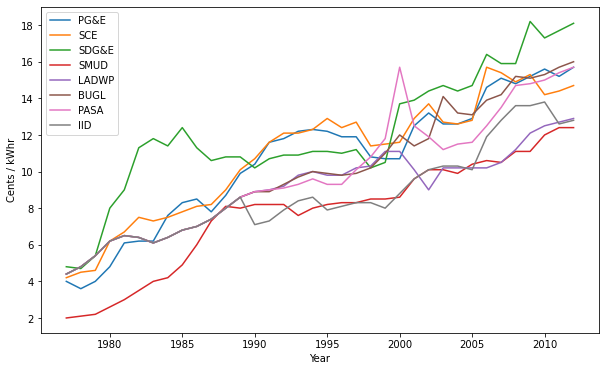

In [8]:
res = util_cost[util_cost['Type'] == 'Residential']

plt.figure(figsize=(10,6))
plt.plot(res['Year'],res[['PG&E','SCE','SDG&E','SMUD','LADWP','BUGL','PASA','IID']])
plt.xlabel('Year')
plt.ylabel('Cents / kWhr')
plt.legend(['PG&E','SCE','SDG&E','SMUD','LADWP','BUGL','PASA','IID']);

### County Population Change

Census data from 2020 (pop) and growth percentage since 2010 (GrowthRate) by county (CTYNAME)

In [9]:
pop_cnty = pd.read_csv('datasets/county_census.csv')
pop_cnty.head()

,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037


### Solar Rooftop Data

This dataset comes from the National Renewable Energy Lab (NREL) and details potential development sites for rooftop solar production. I will use the zipcodes to drop them into counties to summarize the net solar potential by county.

In [10]:
solar = pd.read_csv('datasets/nrel_summary.csv')
solar[solar['State']=='CA'].head().T

,4475,4476,4477,4478,4479
Zip,90001,90002,90003,90004,90005
Zip Percentage,1,1,1,1,1
Region,LosAngeles,LosAngeles,LosAngeles,LosAngeles,LosAngeles
City,-,"Los Angeles, CA","Los Angeles, CA","Los Angeles, CA","Los Angeles, CA"
State,CA,CA,CA,CA,CA
Year,2007,2007,2007,2007,2007
Total Building Count,"11,232","10,105","13,014","7,814","2,084"
Total Roof Area (sq meters),"2,389,681","1,467,885","1,949,595","1,945,381","921,170"
Total Potential Capacity with 10m2 minimum (kW),"174,729.90","89,907.12","125,856.60","110,578.20","53,108.70"
Total potential energy generation with 10m2 minimum (kWh/yr),"263,135,800.00","135,685,100.00","186,517,200.00","168,495,400.00","81,634,900.00"


In [11]:
zip_cnty = pd.read_csv('datasets/zip_cnty.csv')
zip_cnty['County'].value_counts()

Los Angeles        525
San Diego          189
Orange             149
Sacramento         133
San Bernardino     121
Santa Clara        108
Riverside          101
Fresno             100
San Francisco       72
Alameda             70
Kern                69
Contra Costa        51
Sonoma              51
Ventura             48
San Joaquin         43
Tulare              41
Marin               41
Santa Barbara       41
San Mateo           40
Humboldt            38
San Luis Obispo     35
Monterey            35
Shasta              32
El Dorado           30
Placer              29
Stanislaus          28
Mendocino           28
Butte               24
Siskiyou            22
Merced              22
Santa Cruz          22
Yolo                21
Calaveras           21
Imperial            17
Tuolumne            16
Nevada              16
Solano              16
Plumas              16
Lassen              16
Lake                15
Madera              13
Tehama              13
Amador              13
Trinity    

## Final Product Goal

1. County by county forecast of power production/demand and cost
- derived from powerplant database and population forecast
- factors in retirement rate of aging powerplants and assumed reduction in coal, gas, nuclear
- assumes 2010-2020 population growth rates continue
- assumes 2001-2014 electricity rates continue

2. Recommendation for which counties have the most viable market share for rooftop solar development
- based on highest demand/production ratio
- based on amount of fertile development space
- OPTIONAL EXTENSION:  based on average weather (# of sunny days)

### Data Sources

- California energy production:  California Energy Commission
https://ww2.energy.ca.gov/almanac/electricity_data/total_system_power.html

- Powerplant data:  California Energy Commission
https://energyarchive.ca.gov/

- Energy consumption by county:  California Energy Commission
http://www.ecdms.energy.ca.gov/elecbycounty.aspx

- Electricity prices by utility: California Energy Commission
https://energyarchive.ca.gov/

- 2020 census data:  World Population Review
https://worldpopulationreview.com/us-counties/ca/

- Rooftop solar data:  National Renewable Energy Lab
https://data.nrel.gov/submissions/121